In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. Make ‘PassengerId’ as the index column

In [4]:
data = data.set_index(['PassengerId'])

In [5]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are null values in certain columns like 'age','cabin','embarked'

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 4. Fill in all the missing values present in all the columns in the dataset

In [9]:
#we've missing values in 1)age 2)cabin 3)embarked

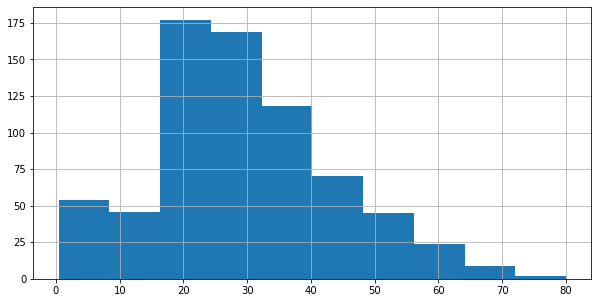

In [10]:
#plottting the distribution to identify which to use for filling missing values
freqgraph = data.Age
freqgraph.hist(figsize=(10,5))
plt.show()

In [11]:
#missing values in AGE is filled using median as the distribution is left skewed

In [12]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [13]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
#missing values in EMBARKED is filled using mode

In [15]:
import statistics as st
mode_Embarked  = st.mode(data['Embarked'])

In [16]:
data['Embarked'] = data['Embarked'].fillna(mode_Embarked)

In [17]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [18]:
#dropping the CABIN column as it has more than 20% of missing values
data.drop(['Cabin'],axis=1,inplace=True)

In [19]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset

Fare

Text(0.5, 1.0, 'boxplot for fare column')

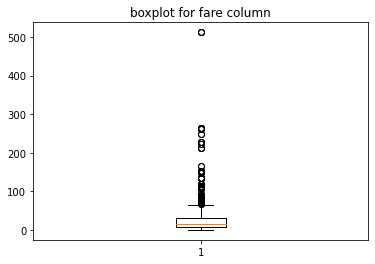

In [20]:
plt.boxplot(data['Fare'])
plt.title('boxplot for fare column')

In [21]:
#handling outliers in fare
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [22]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [23]:
IQR=Q3-Q1

In [24]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [25]:
low_lim

-26.724

In [26]:
up_lim

65.6344

In [27]:
outliers = []
for x in data['Fare']:
    if((x<low_lim) or (x>up_lim)):
        outliers.append(x)

In [28]:
outliers

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [29]:
pd.Series(outliers).count()

116

In [30]:
ind1 = data['Fare']>up_lim
index1 = data.loc[ind1].index
index1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [31]:
ind2 = data['Fare']<low_lim
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [32]:
#all the outliers are above upper limit only
data.drop(index1, inplace = True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Name      775 non-null    object 
 3   Sex       775 non-null    object 
 4   Age       775 non-null    float64
 5   SibSp     775 non-null    int64  
 6   Parch     775 non-null    int64  
 7   Ticket    775 non-null    object 
 8   Fare      775 non-null    float64
 9   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 66.6+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x28136bca7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28136bcaeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28136bca490>],
 'medians': [<matplotlib.lines.Line2D at 0x28136bd65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28136bd6910>],
 'means': []}

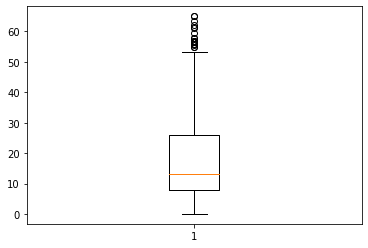

In [34]:
plt.boxplot(data["Fare"])

SibSp	

Text(0.5, 1.0, 'boxplot for SibSp')

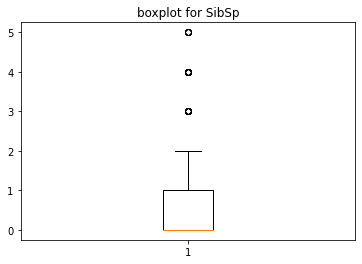

In [35]:
plt.boxplot(data['SibSp'])
plt.title('boxplot for SibSp')

In [36]:
#handling outliers in SibSp
Q1a = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2a = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3a = np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [37]:
print(Q1a)
print(Q2a)
print(Q3a)

0.0
0.0
1.0


In [38]:
IQRa=Q3a-Q1a
IQRa

1.0

In [39]:
low_lim1 = Q1a-1.5*IQRa
up_lim1 = Q3a+1.5*IQRa

In [40]:
low_lim1

-1.5

In [41]:
up_lim1

2.5

In [42]:
outliers1 = []
for x in data['SibSp']:
    if((x<low_lim1) or (x>up_lim1)):
        outliers1.append(x)

In [43]:
outliers1

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [44]:
pd.Series(outliers1).count()

36

In [45]:
ind1a = data['SibSp']>up_lim1
index1a = data.loc[ind1a].index
index1a

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [46]:
ind2a = data['SibSp']<low_lim1
data.loc[ind2a].index

Int64Index([], dtype='int64', name='PassengerId')

In [47]:
data.drop(index1a, inplace = True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  739 non-null    int64  
 1   Pclass    739 non-null    int64  
 2   Name      739 non-null    object 
 3   Sex       739 non-null    object 
 4   Age       739 non-null    float64
 5   SibSp     739 non-null    int64  
 6   Parch     739 non-null    int64  
 7   Ticket    739 non-null    object 
 8   Fare      739 non-null    float64
 9   Embarked  739 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 63.5+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x28136c8de20>,
 'caps': [<matplotlib.lines.Line2D at 0x28136c9b520>,
 'boxes': [<matplotlib.lines.Line2D at 0x28136c8dac0>],
 'medians': [<matplotlib.lines.Line2D at 0x28136c9bbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28136c9bf40>],
 'means': []}

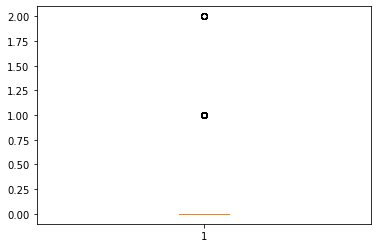

In [49]:
plt.boxplot(data['SibSp'])

Parch

Text(0.5, 1.0, 'boxplot for Parch column')

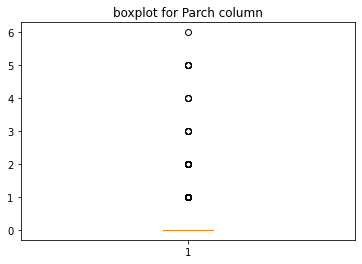

In [50]:
plt.boxplot(data['Parch'])
plt.title('boxplot for Parch column')

In [51]:
Q1ab = np.percentile(data['Parch'], 25, interpolation='midpoint')
Q2ab = np.percentile(data['Parch'], 50, interpolation='midpoint')
Q3ab = np.percentile(data['Parch'], 75, interpolation='midpoint')

In [52]:
print(Q1ab)
print(Q2ab)
print(Q3ab)

0.0
0.0
0.0


In [53]:
#this indicate that there're no outliers in 'parch' column

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target) 

<AxesSubplot:>

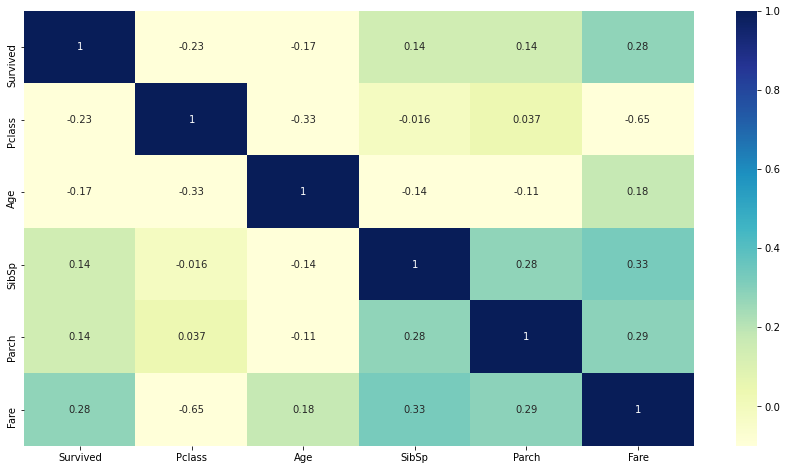

In [54]:
corrmatrix =data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,vmin=-.1,vmax=1,annot=True,cmap='YlGnBu')

In [55]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [65]:
y = data['Survived']
x = data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

In [66]:
from sklearn import preprocessing

In [67]:
min_max = preprocessing.MinMaxScaler(feature_range = (0,1))


In [68]:
x = min_max.fit_transform(x)

In [69]:
x = pd.DataFrame(x)

In [70]:
#performing linear regression model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr =linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction = model.predict(x_test)
print('MSE is :',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE is : 0.1852546454364851
R squared value is : 0.17974171141282214
